In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [2]:
# Download datasets
from google.colab import files
uploaded = files.upload()

Saving bcsc_risk_factors_summarized1_092020.csv to bcsc_risk_factors_summarized1_092020.csv
Saving bcsc_risk_factors_summarized2_092020.csv to bcsc_risk_factors_summarized2_092020.csv
Saving bcsc_risk_factors_summarized3_092020.csv to bcsc_risk_factors_summarized3_092020.csv


In [13]:
df_1 = pd.read_csv('bcsc_risk_factors_summarized1_092020.csv')
df_2 = pd.read_csv('bcsc_risk_factors_summarized2_092020.csv')
df_3 = pd.read_csv('bcsc_risk_factors_summarized3_092020.csv')

In [14]:
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
print(df.shape)

(1522340, 13)


In [15]:
df.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,2013,7,1,0,9,3,1,1,2,3,0,0,7
1,2013,7,1,0,9,3,1,1,2,3,1,0,3
2,2013,7,1,0,9,3,1,1,2,4,0,0,6
3,2013,7,1,0,9,3,1,1,2,4,1,0,1
4,2013,7,1,0,9,3,1,1,2,4,1,1,1


In [16]:
# Drop columns "year" and "count"
df = df.drop(columns=['year', 'count'])

# Making data types categorical
df = df.astype('category')

In [17]:
# Replace 9 with NaN in all columns except "age_group_5_years"
cols_except_age = df.columns[df.columns != 'age_group_5_years']
df[cols_except_age] = df[cols_except_age].replace(9, np.nan)

# Drop rows where breast_cancer_history(target) is NaN
df = df.dropna(subset=['breast_cancer_history'])

/tmp/ipython-input-564063165.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[cols_except_age] = df[cols_except_age].replace(9, np.nan)


In [18]:
# Percentage of NaNs in each column
missing_info = pd.DataFrame({
    'Missing Count': df.isna().sum(),
    'Missing %': (df.isna().sum() / len(df)) * 100
})

print(missing_info)

                       Missing Count  Missing %
age_group_5_years                  0   0.000000
race_eth                       74699   6.269651
first_degree_hx                37109   3.114640
age_menarche                  529232  44.419601
age_first_birth               234599  19.690408
BIRADS_breast_density         144193  12.102434
current_hrt                   124688  10.465337
menopaus                      105394   8.845949
bmi_group                     309681  25.992204
biophx                         22425   1.882179
breast_cancer_history              0   0.000000


In [19]:
# Fill NaN in each remaining column with the mode
for col in df.columns:
    if col != 'breast_cancer_history':
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1306297356.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [21]:
rows, cols = df.shape
print(f"Number of samples: {rows}")
print(f"Number of features: {cols}")

Number of samples: 1191438
Number of features: 11


In [22]:
# One-hot encoding for 'race_eth'
df = pd.get_dummies(df, columns=['race_eth'], drop_first=True)

# Data Visualization

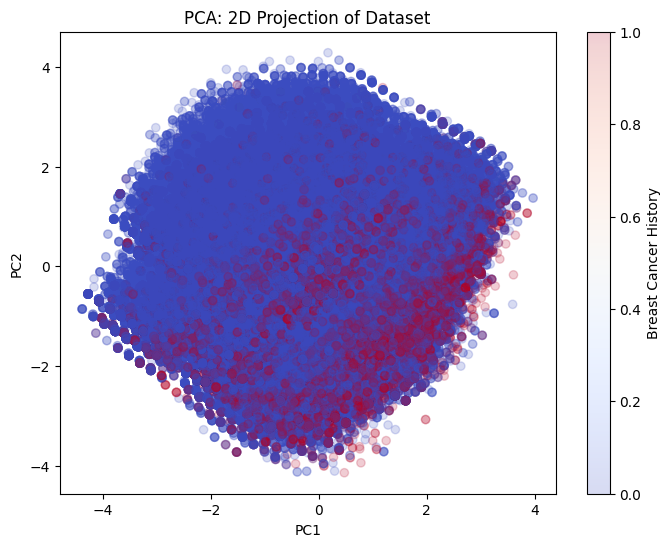

In [23]:
# Separating features and target
X = df.drop(columns=['breast_cancer_history'])
y = df['breast_cancer_history']

# Scaling features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appling PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2D scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: 2D Projection of Dataset')
plt.colorbar(label='Breast Cancer History')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


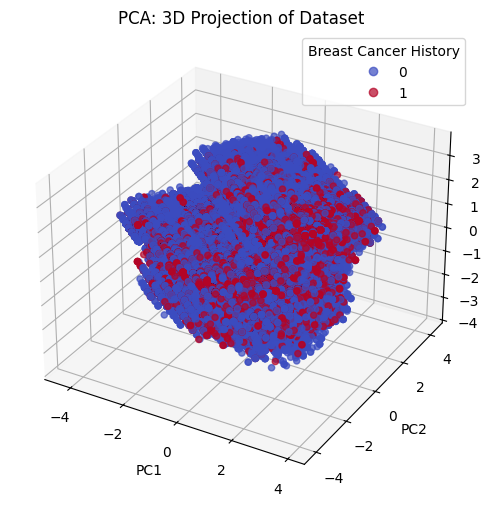

In [24]:
# 3D PCA plot
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=y, cmap='coolwarm', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA: 3D Projection of Dataset')
plt.legend(*scatter.legend_elements(), title='Breast Cancer History')
plt.show()

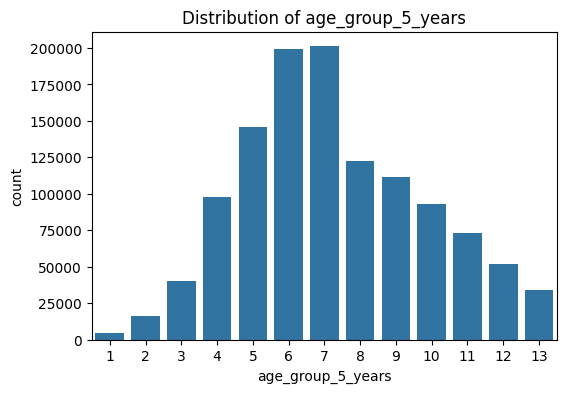

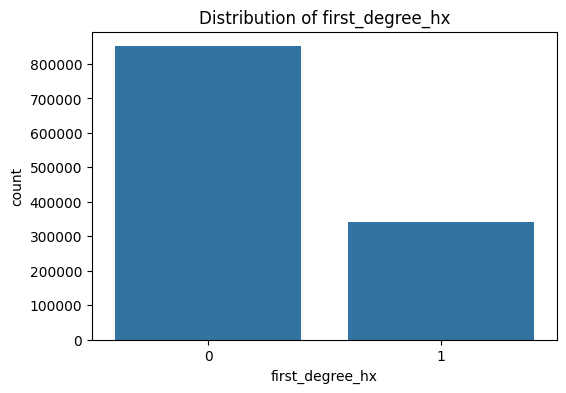

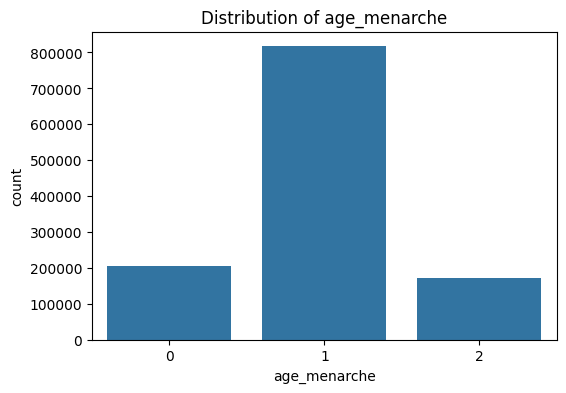

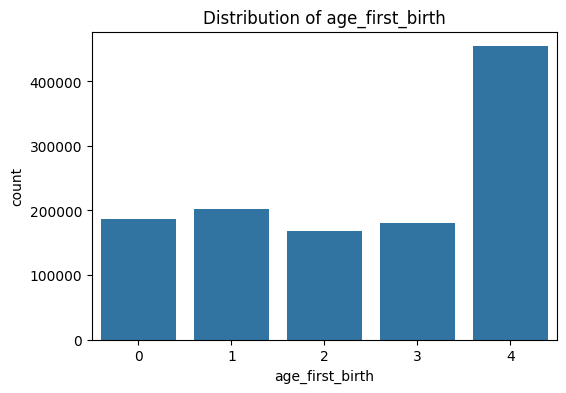

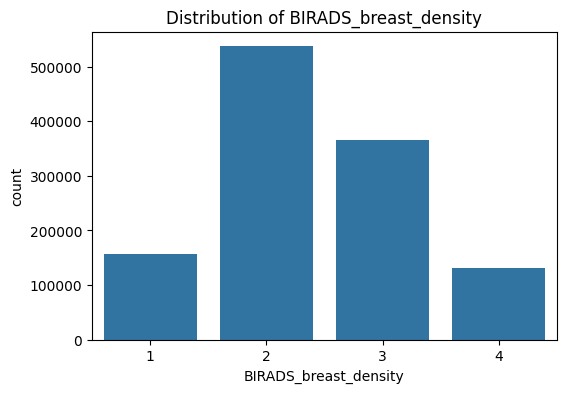

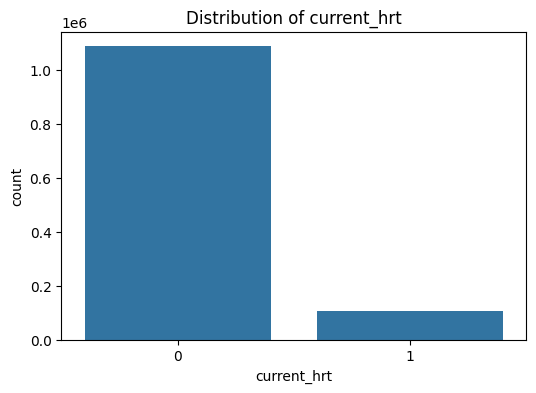

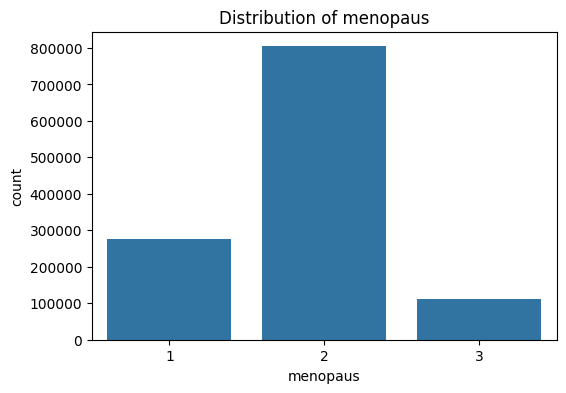

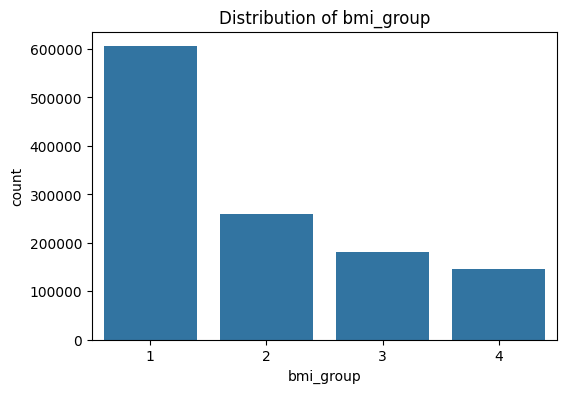

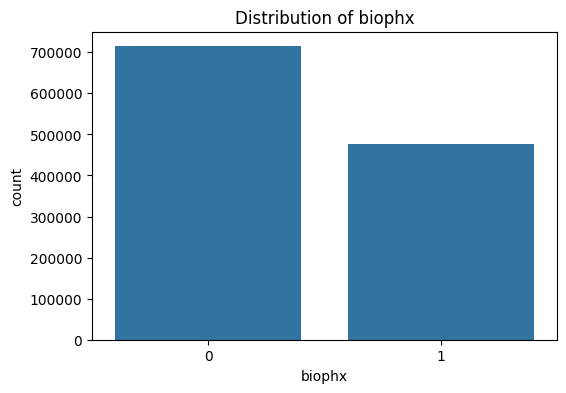

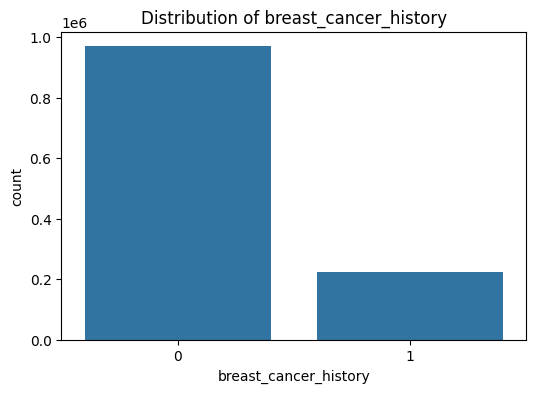

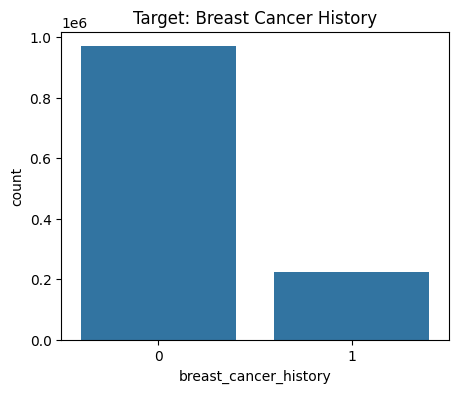

In [25]:
# Distribution of each feature in 3-class case
ordinal_cols = ['age_group_5_years', 'first_degree_hx', 'age_menarche', 'age_first_birth',
                'BIRADS_breast_density', 'current_hrt', 'menopaus', 'bmi_group',
                'biophx', 'breast_cancer_history']

for col in ordinal_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count of target variable
plt.figure(figsize=(5,4))
sns.countplot(x='breast_cancer_history', data=df)
plt.title('Target: Breast Cancer History')
plt.show()

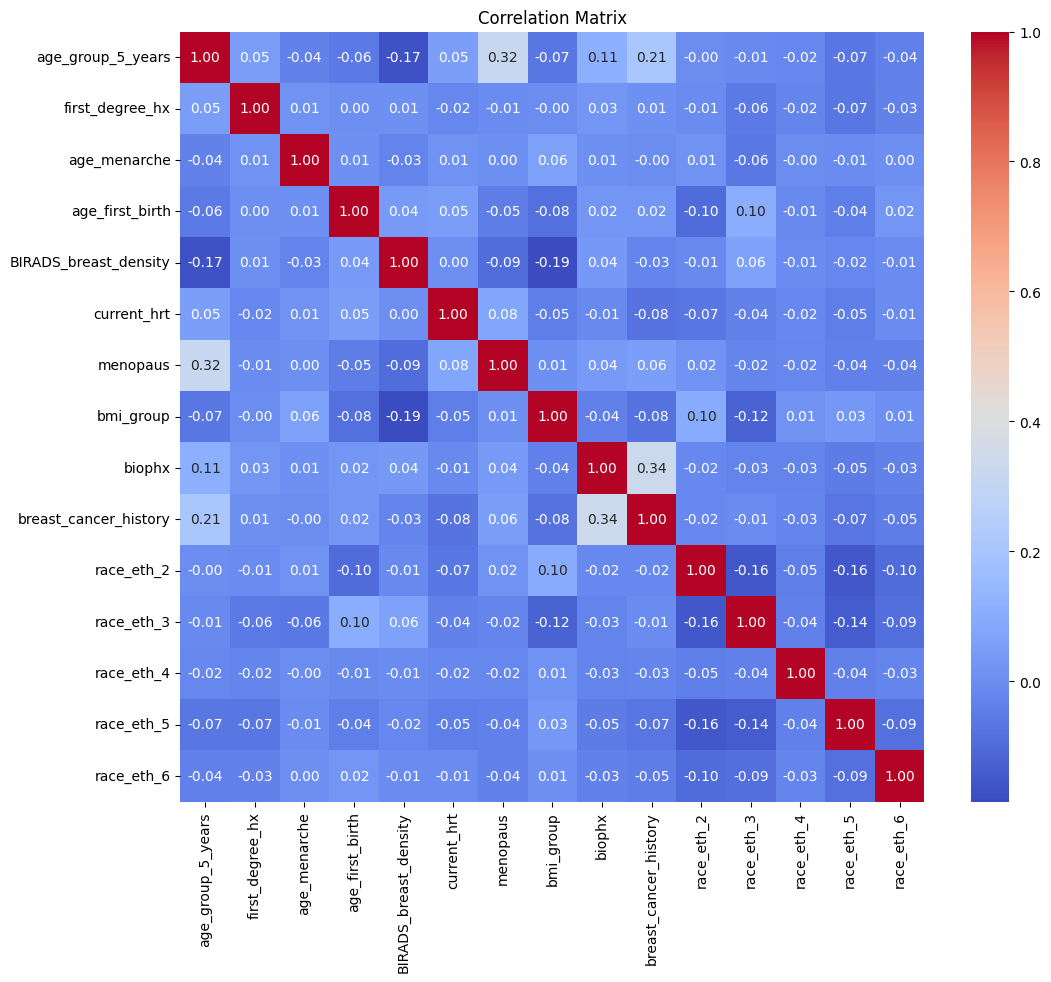

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

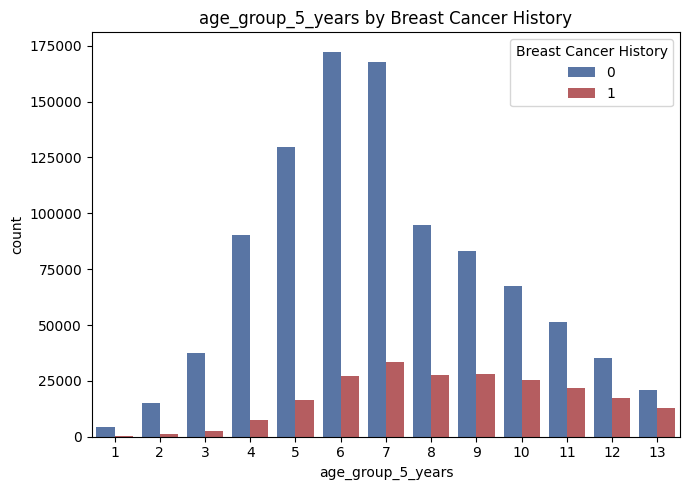

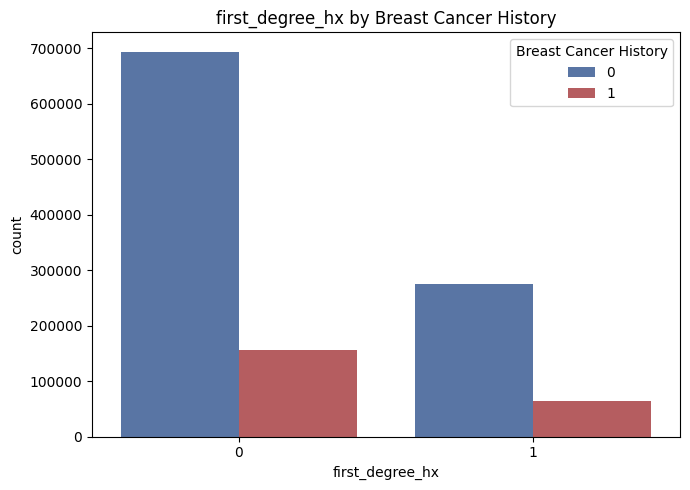

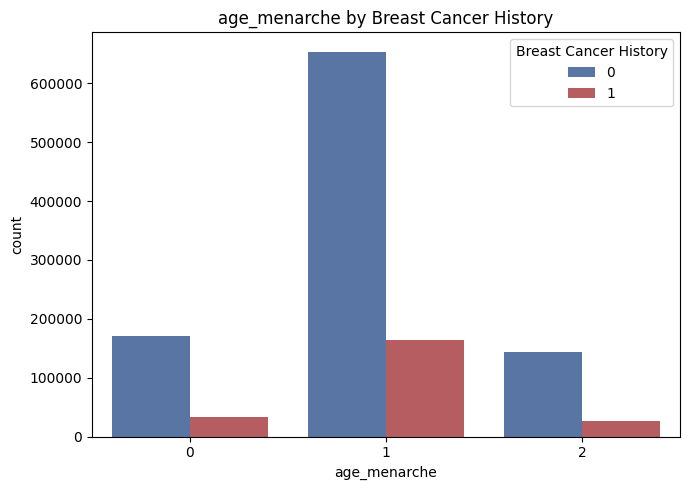

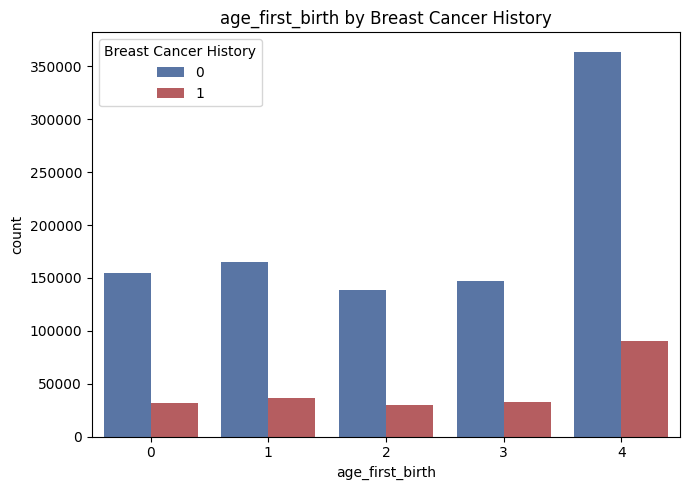

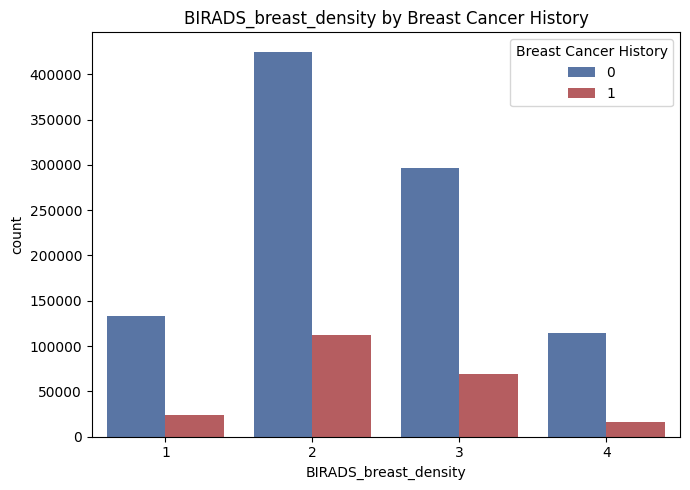

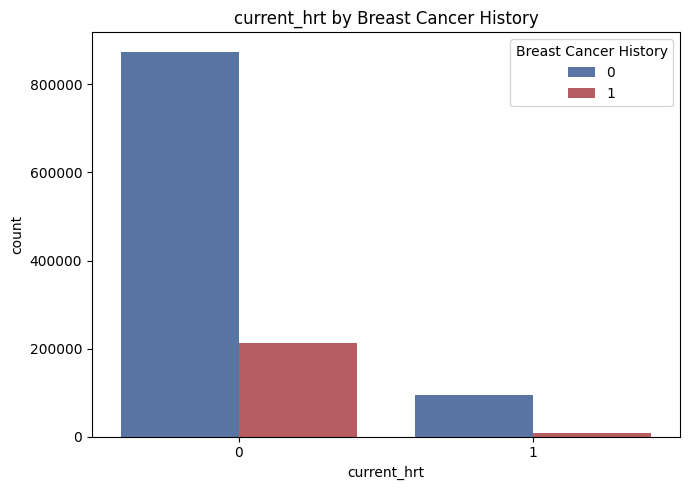

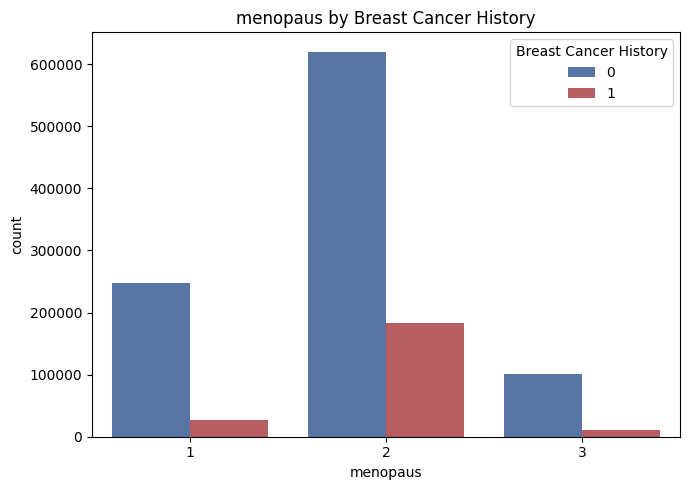

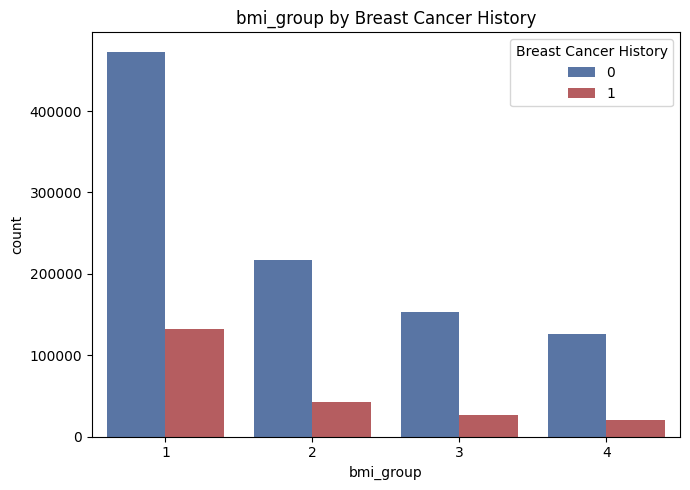

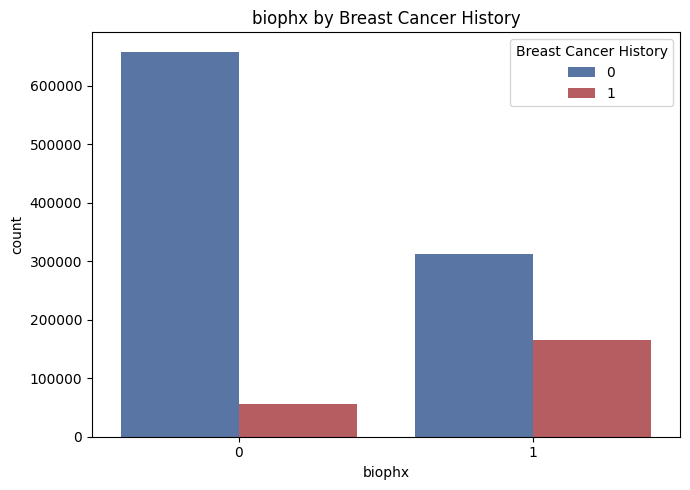

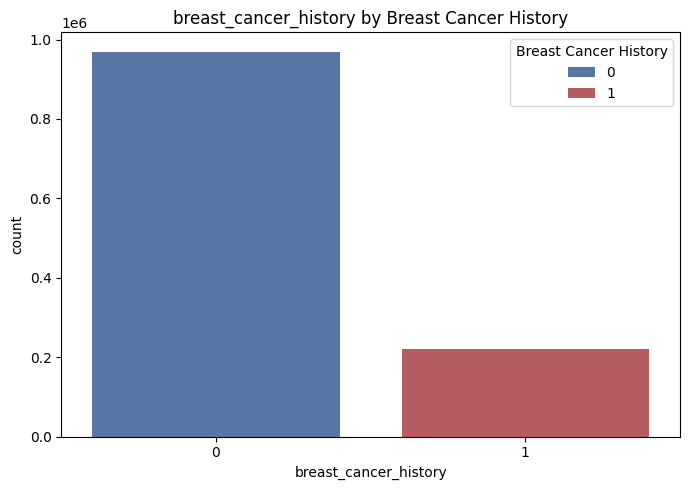

In [27]:
# Feature vs. breast_cancer_history
palette_custom = ['#4C72B0', '#C44E52']

for col in ordinal_cols:
    plt.figure(figsize=(7,5))
    sns.countplot(x=col, hue='breast_cancer_history', data=df, palette=palette_custom)
    plt.title(f'{col} by Breast Cancer History')
    plt.legend(title='Breast Cancer History')
    plt.tight_layout()
    plt.show()

# Identifying Borderline Non-Cancer Cases

In [28]:
from sklearn.linear_model import LogisticRegression

# Features & target that were already defined
X = df.drop(columns=['breast_cancer_history'])
y = df['breast_cancer_history']

# Logistic regression
model = LogisticRegression(max_iter=5000)
model.fit(X, y)

# Predicted cancer probability
df['pred_prob'] = model.predict_proba(X)[:, 1]

# New 3-class column (start as copy of y)
df['breast_cancer_history_3class'] = df['breast_cancer_history'].copy()

# dtype allows category 2
df['breast_cancer_history_3class'] = df['breast_cancer_history_3class'].cat.add_categories([2])

# Thresholds for borderline high-risk class
lower_thresh = 0.35
upper_thresh = 0.50

# Apply new class labeling
borderline_mask = (
    (df['breast_cancer_history'] == 0) &
    (df['pred_prob'] >= lower_thresh) &
    (df['pred_prob'] <= upper_thresh)
)

df.loc[borderline_mask, 'breast_cancer_history_3class'] = 2

# Confirm distribution of classes
print(df['breast_cancer_history_3class'].value_counts())
print(df['breast_cancer_history_3class'].dtype)

breast_cancer_history_3class
0    888887
1    221776
2     80775
Name: count, dtype: int64
category


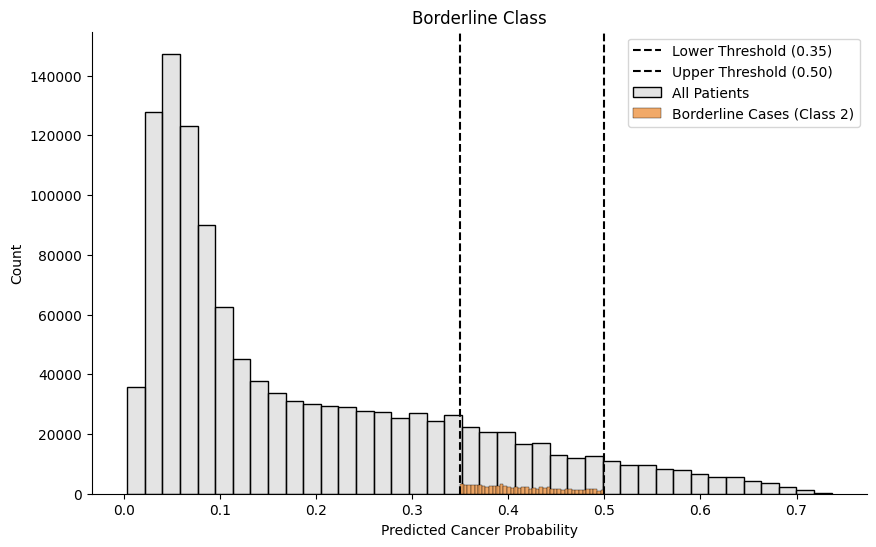

In [29]:
# Plot boarderline cases
plt.figure(figsize=(10,6))

sns.histplot(
    data=df,
    x='pred_prob',
    bins=40,
    color='lightgray',
    alpha=0.6,
    label='All Patients'
)

borderline_df = df[df['breast_cancer_history_3class'] == 2]

sns.histplot(
    data=borderline_df,
    x='pred_prob',
    bins=40,
    color='#f0a057',
    alpha=0.9,
    label='Borderline Cases (Class 2)'
)

# Threshold lines
plt.axvline(0.35, color='black', linestyle='--', label='Lower Threshold (0.35)')
plt.axvline(0.50, color='black', linestyle='--',  label='Upper Threshold (0.50)')

plt.title("Borderline Class")
plt.xlabel("Predicted Cancer Probability")
plt.ylabel("Count")
plt.legend()
sns.despine()
plt.show()

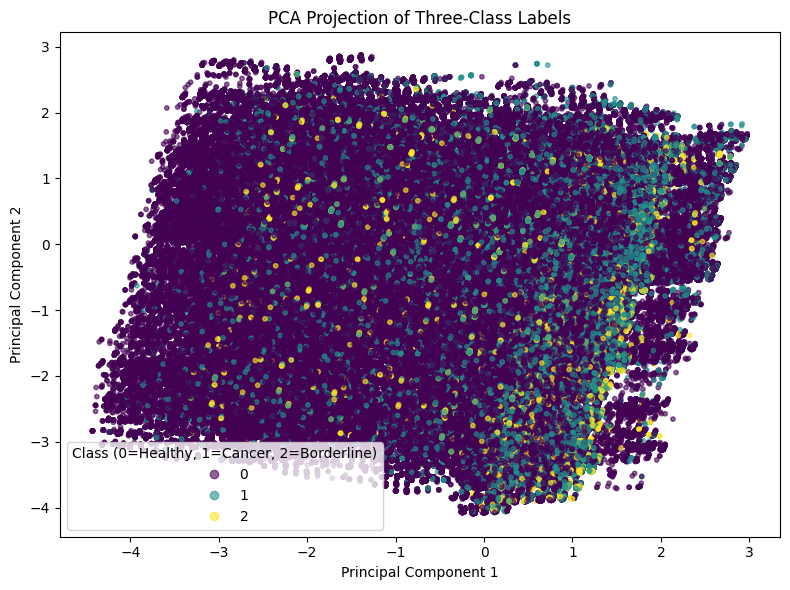

Explained variance ratio: [0.06319698 0.05180046]


In [30]:
# PCA for 3-class case data
X = df.drop(columns=['breast_cancer_history',
                     'pred_prob',
                     'breast_cancer_history_3class'])

y = df['breast_cancer_history_3class']

X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap="viridis",
    alpha=0.6,
    s=10
)
plt.title("PCA Projection of Three-Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(*scatter.legend_elements(),
           title="Class (0=Healthy, 1=Cancer, 2=Borderline)",
           loc="best")
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

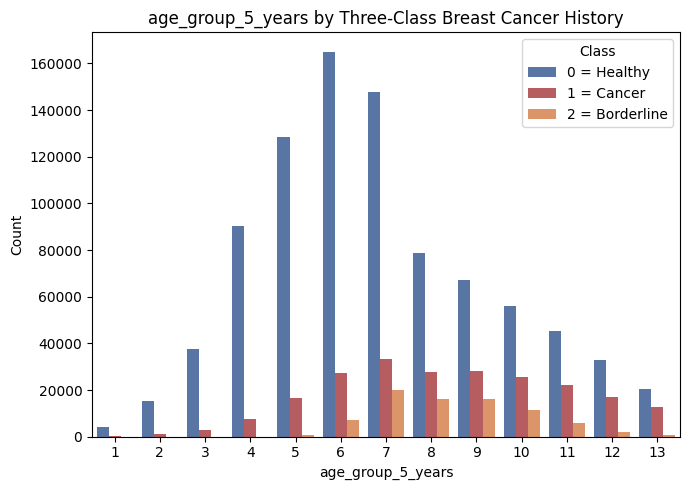

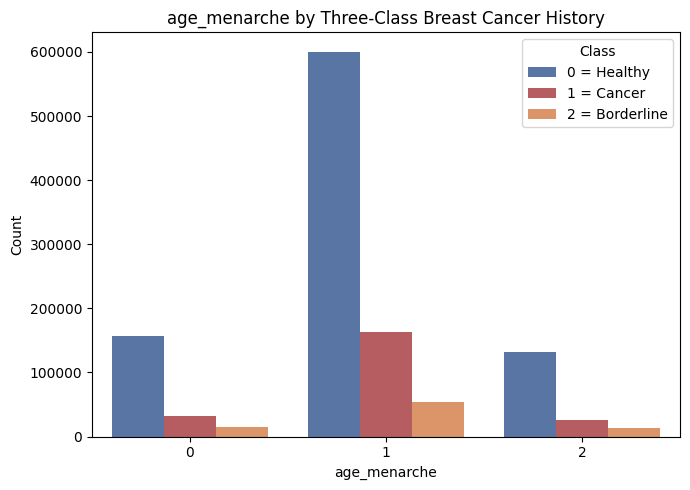

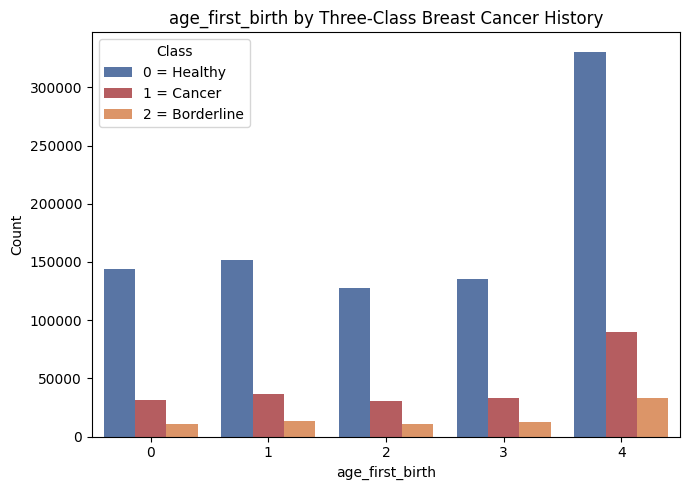

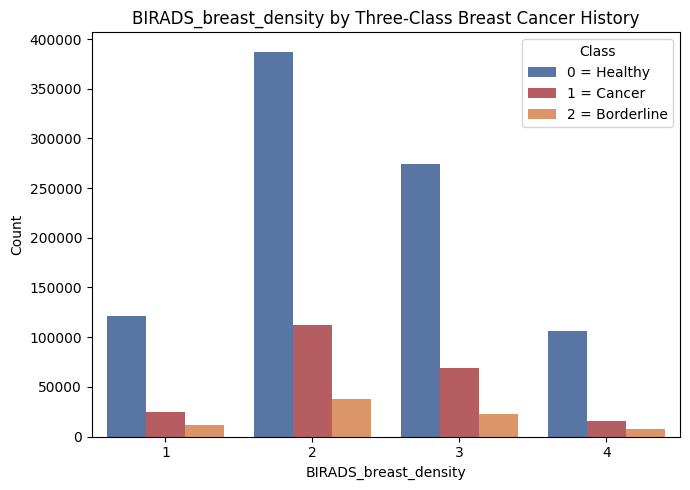

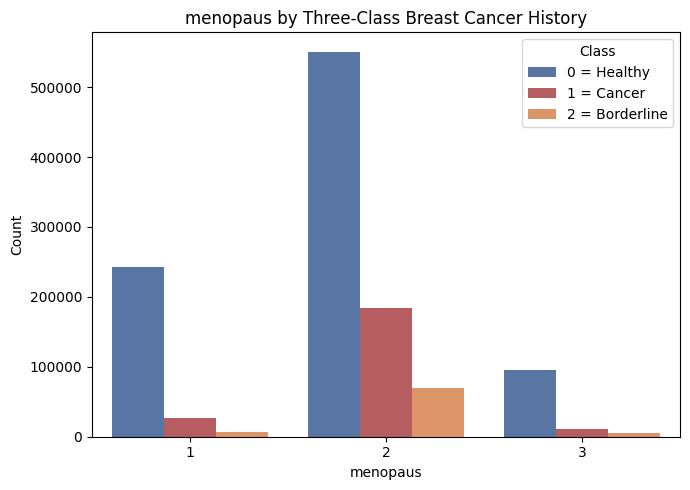

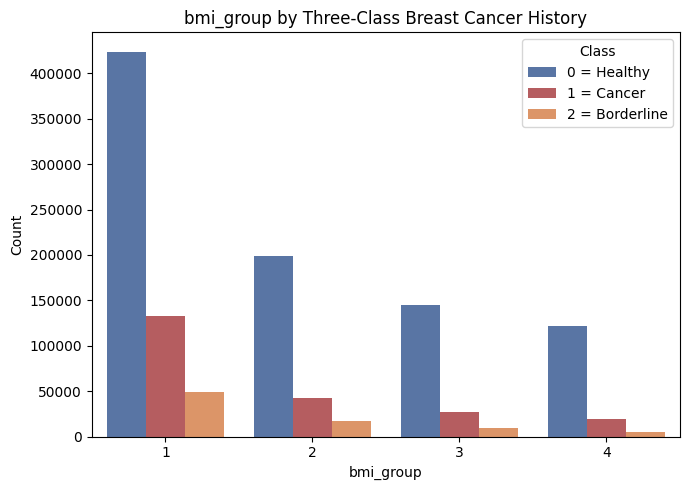

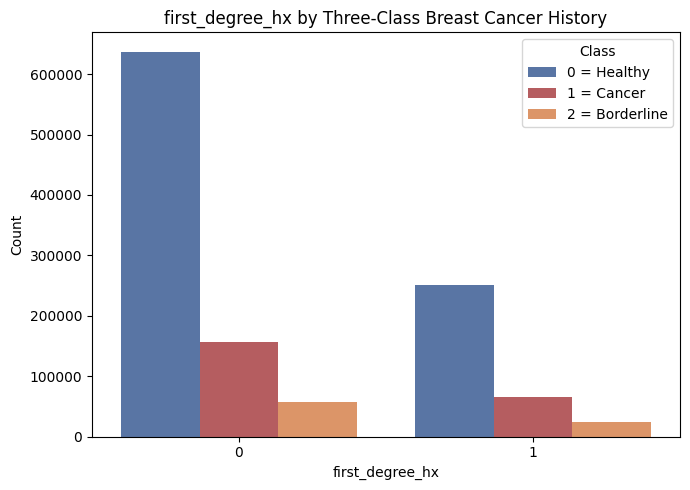

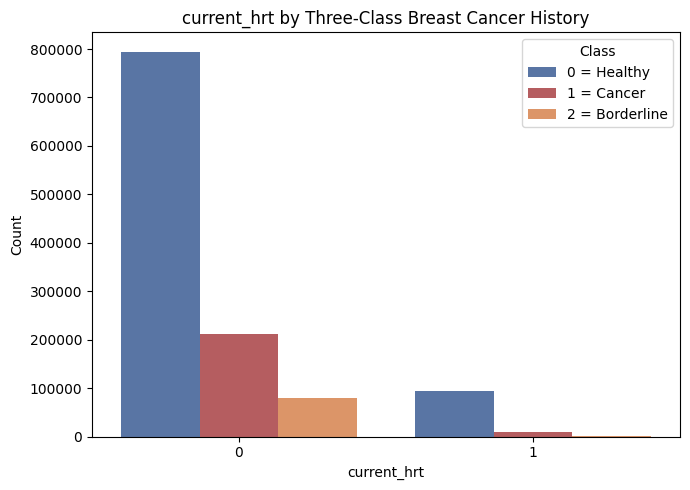

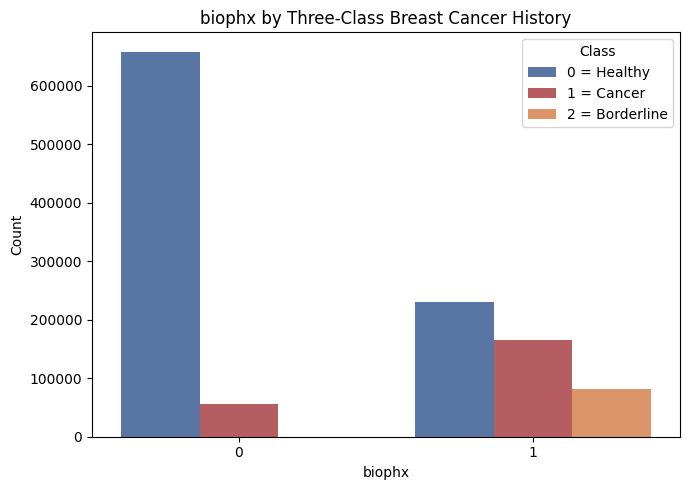

In [31]:
# Distribution of each feature in 3-class case
custom_colors = ['#4C72B0', '#C44E52', '#f09054']

ordinal_cols = ['age_group_5_years', 'age_menarche', 'age_first_birth',
                'BIRADS_breast_density', 'menopaus', 'bmi_group',
                'first_degree_hx', 'current_hrt', 'biophx']

for col in ordinal_cols:
    plt.figure(figsize=(7,5))

    sns.countplot(
        x=col,
        hue='breast_cancer_history_3class',
        data=df,
        palette=custom_colors,
        hue_order=[0, 1, 2]
    )

    plt.title(f'{col} by Three-Class Breast Cancer History')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(
        title='Class',
        labels=['0 = Healthy', '1 = Cancer', '2 = Borderline']
    )
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2867884799.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Cancer', 'Cancer'])


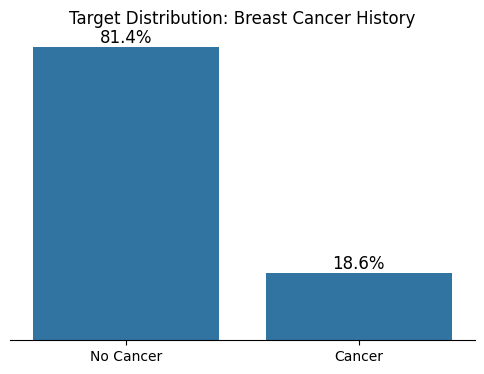

In [32]:
plt.figure(figsize=(6,4))
total = len(df)
ax = sns.countplot(x='breast_cancer_history', data=df)
ax.set_xticklabels(['No Cancer', 'Cancer'])
ax.set_xlabel('')
ax.set_yticks([])
ax.set_ylabel('')
sns.despine(left=True, bottom=False, right=True, top=True)

for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.title('Target Distribution: Breast Cancer History')
plt.show()

/tmp/ipython-input-292413755.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Cancer', 'Cancer', 'Maybe'])


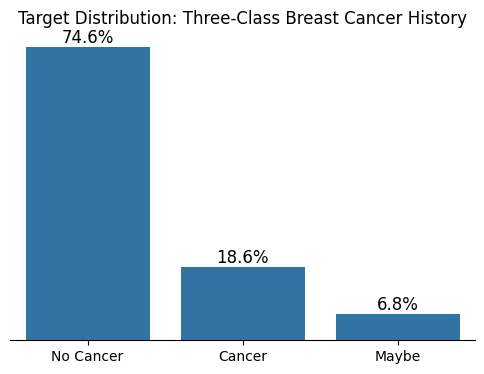

In [33]:
plt.figure(figsize=(6,4))

# Count percentages
total = len(df)
ax = sns.countplot(
    x='breast_cancer_history_3class',
    data=df,
    order=[0, 1, 2]
)

ax.set_xticklabels(['No Cancer', 'Cancer', 'Maybe'])
ax.set_xlabel('')
ax.set_yticks([])
ax.set_ylabel('')
sns.despine(left=True, bottom=False, right=True, top=True)

for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.title('Target Distribution: Three-Class Breast Cancer History')
plt.show()

/tmp/ipython-input-130551800.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_labels[:df['age_group_5_years'].nunique()])


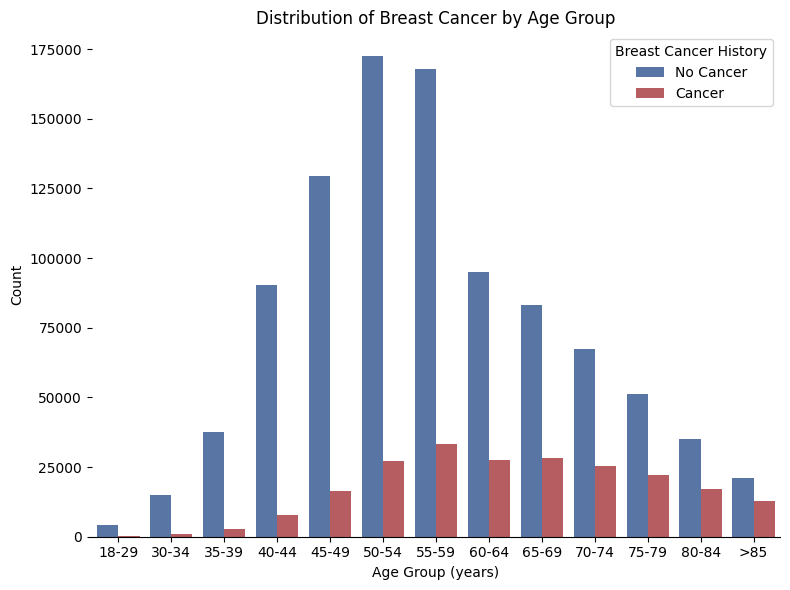

In [35]:
plt.figure(figsize=(8,6))

# Count plot
ax = sns.countplot(
    x='age_group_5_years',
    hue='breast_cancer_history',
    data=df,
    palette=palette_custom
)

# Age group labels
age_labels = [
    '18-29', '30-34', '35-39', '40-44', '45-49', '50-54',
    '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '>85'
]
ax.set_xticklabels(age_labels[:df['age_group_5_years'].nunique()])
sns.despine(left=True, right=True, top=True)
ax.legend(title='Breast Cancer History', labels=['No Cancer', 'Cancer'])
ax.set_xlabel('Age Group (years)')
ax.set_ylabel('Count')

plt.title('Distribution of Breast Cancer by Age Group')
plt.tight_layout()
plt.show()